# 1 正则化线性回归
先对一个水库的流出水量以及水库水位进行正则化线性回归，然后探讨方差-偏差的问题

In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn是一种开源的数据可视化工具,在Matplotlib的基础上进行了更高级的API封装,因此可进行更复杂的图形设计和输出

In [2]:
data = sio.loadmat('data/ex5data1.mat')
X, y, Xval, yval, Xtest, ytest = map(np.ravel,[data['X'], data['y'], data['Xval'], data['yval'], data['Xtest'], data['ytest']])
X.shape, y.shape, Xval.shape, yval.shape, Xtest.shape, ytest.shape

((12,), (12,), (21,), (21,), (21,), (21,))

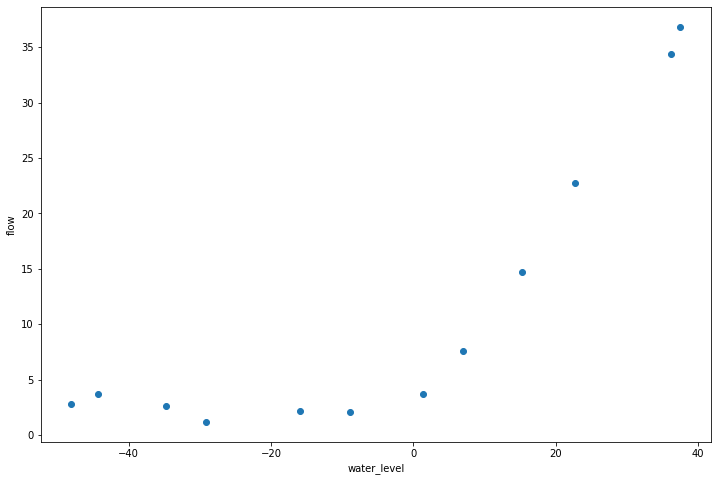

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, y)
ax.set_xlabel('water_level')
ax.set_ylabel('flow')
plt.show()

In [4]:
X

array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
       -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
         1.38915437, -44.38375985,   7.01350208,  22.76274892])

In [5]:
 X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]

In [6]:
X

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [7]:
def cost(theta, X, y,reg = 1):
    
    m = X.shape[0]
    inner = X @ theta - y        #matmul(A,C)=np.dot(A,C)=A@C都属于叉乘，而multiply(A,C)= A*C=A∙C属于点乘
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)
    reg_term = (reg / (2 * m)) * np.power(theta[1:], 2).sum()
    cost+=reg_term

    return cost

In [8]:
theta = np.ones(X.shape[1])
cost(theta, X, y, 1)

303.9931922202643

In [9]:
def gradient(theta, X, y,reg):
    m = X.shape[0]

    inner = (1/m)*X.T @ (X @ theta - y)  # (m,n).T @ (m, 1) -> (n, 1)
    
    regularized_term = theta.copy()  # same shape as theta
    regularized_term[0] = 0  # don't regularize intercept theta
    regularized_term = (reg / m) * regularized_term
    inner+=regularized_term


    return inner

In [10]:
gradient(theta, X, y, 1)

array([-15.30301567, 598.25074417])

In [11]:
#令λ=0，因为训练的是2维的，所以正则化不会对这种低维的有很大的帮助
theta = np.ones(X.shape[1])
final_theta = opt.minimize(fun=cost, x0=theta, args=(X, y, 0), method='TNC', jac=gradient, options={'disp': True}).x
final_theta

array([13.08790352,  0.36777923])

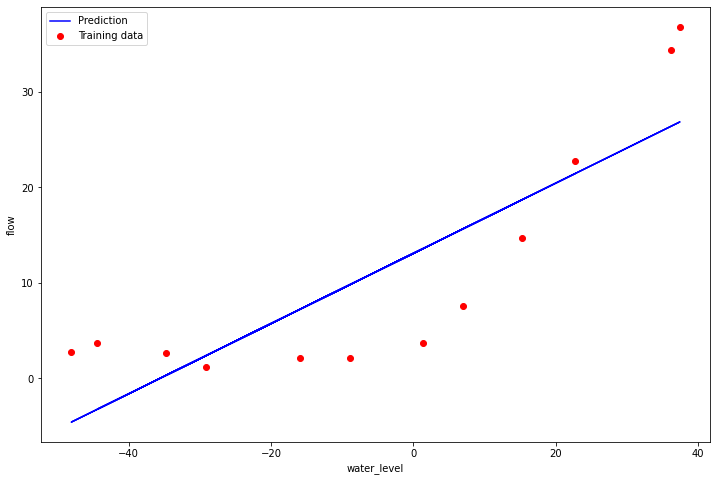

In [12]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[:,1], y, c='r', label="Training data")
plt.plot(X[:, 1], X[:, 1]*m + b, c='b', label="Prediction")
ax.set_xlabel('water_level')
ax.set_ylabel('flow')
ax.legend()
plt.show()

#### 2 方差和偏差
机器学习中的一个重要概念是偏差-方差权衡。偏差较大的模型会欠拟合，而方差较大的模型会过拟合。这部分要画出学习曲线来判断方差和偏差的问题。

In [13]:
def linear_regression(X, y, l=1):
    
    theta = np.ones(X.shape[1])
    res = opt.minimize(fun=cost,x0=theta,args=(X, y, l),method='TNC',jac=gradient,options={'disp': True})
    return res

In [14]:
training_cost, cv_cost = [], []

In [15]:
m = X.shape[0]
for i in range(1, m+1):
    res = linear_regression(X[:i, :], y[:i], 0)
    
    tc = cost(res.x, X[:i, :], y[:i], 0)
    cv = cost(res.x, Xval, yval, 0)
   
    training_cost.append(tc) #append：在列表末尾添加新的对象
    cv_cost.append(cv)

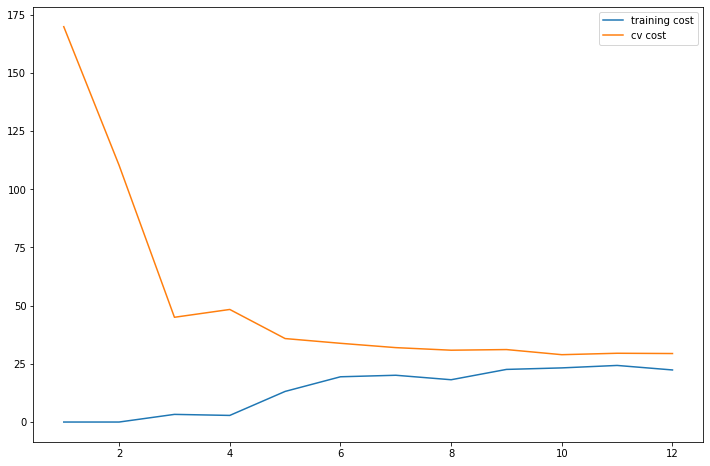

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(1, m+1), training_cost, label='training cost')
plt.plot(np.arange(1, m+1), cv_cost, label='cv cost')
plt.legend()
plt.show()
#欠拟合

#### 3 多项式回归
线性回归对于现有数据来说太简单，会欠拟合，需要多添加一些特征。

In [17]:
#写一个函数，输入原始X，和幂的次数p，返回X的1到p次幂
def poly_features(x, power, as_ndarray=False): #特征映射
    data = {'f{}'.format(i): np.power(x, i) for i in range(1, power + 1)}
    df = pd.DataFrame(data) #类似excel，是一种二维表。

    return df.values if as_ndarray else df

In [18]:
X

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [19]:
data = sio.loadmat('data/ex5data1.mat') #读取 mat 文件
X, y, Xval, yval, Xtest, ytest = map(np.ravel,[data['X'], data['y'], data['Xval'], data['yval'], data['Xtest'], data['ytest']])
#ravel：扁平化函数
poly_features(X, power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


In [20]:
X

array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
       -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
         1.38915437, -44.38375985,   7.01350208,  22.76274892])

In [21]:
#归一化
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [22]:
def prepare_poly_data(*args, power): #*args：将不定数量的参数传递给一个函数
    
    """
    args: keep feeding in X, Xval, or Xtest
    单引号和双引号是单行字符串
    三引号是多行字符串，可以直接输入回车，而不需要用\n来表示
    也可以用来表示多行注释
    
    """
#扩展特征
    def prepare(x):
        df = poly_features(x, power=power)
        ndarr = normalize_feature(df).values
        return np.insert(ndarr, 0, np.ones(ndarr.shape[0]), axis=1)
    return [prepare(x) for x in args]

In [23]:
#扩展特征到8阶特征
X_poly, Xval_poly, Xtest_poly= prepare_poly_data(X, Xval, Xtest, power=8)
X_poly[:3, :]

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01]])

In [24]:
def plot_learning_curve(X, Xinit, y, Xval, yval, l=0):
    training_cost, cv_cost = [], []
    m = X.shape[0]

    for i in range(1, m + 1):
        res = linear_regression(X[:i, :], y[:i], l=l)
        tc = cost(res.x, X[:i, :], y[:i])
        cv = cost(res.x, Xval, yval)

        training_cost.append(tc)
        cv_cost.append(cv)

    #绘图
    fig, ax = plt.subplots(2,  1, figsize=(12, 12))
    ax[0].plot(np.arange(1, m + 1), training_cost, label='training cost')
    ax[0].plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    ax[0].legend()

    fitx = np.linspace(-50, 50, 100) 
    fitxtmp = prepare_poly_data(fitx, power=8)
    fity = np.dot(prepare_poly_data(fitx, power=8)[0], linear_regression(X, y, l).x.T)
    
    ax[1].plot(fitx, fity, c='r', label='fitcurve')
    ax[1].scatter(Xinit, y, c='b', label='initial_Xy')
    
    ax[1].set_xlabel('water_level')
    ax[1].set_ylabel('flow')

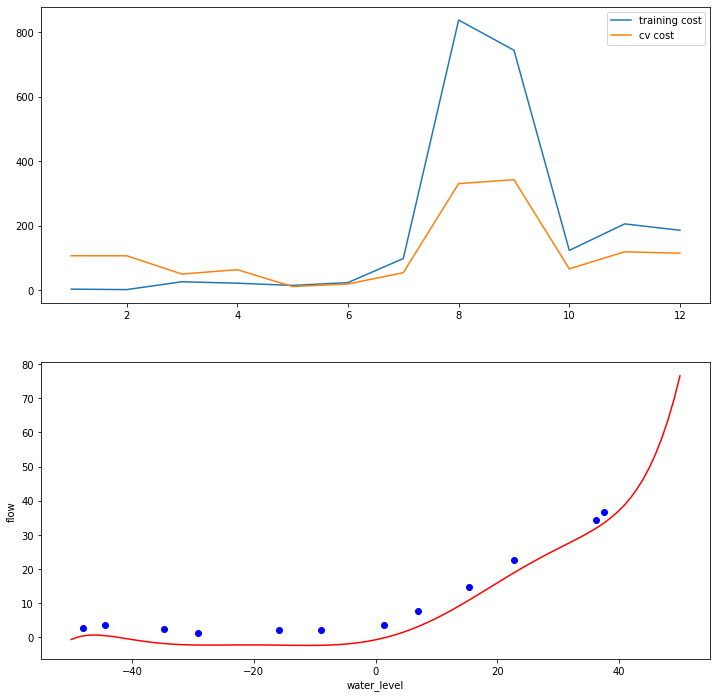

In [25]:
plot_learning_curve(X_poly, X, y, Xval_poly, yval, l=0)
plt.show()
#过拟合

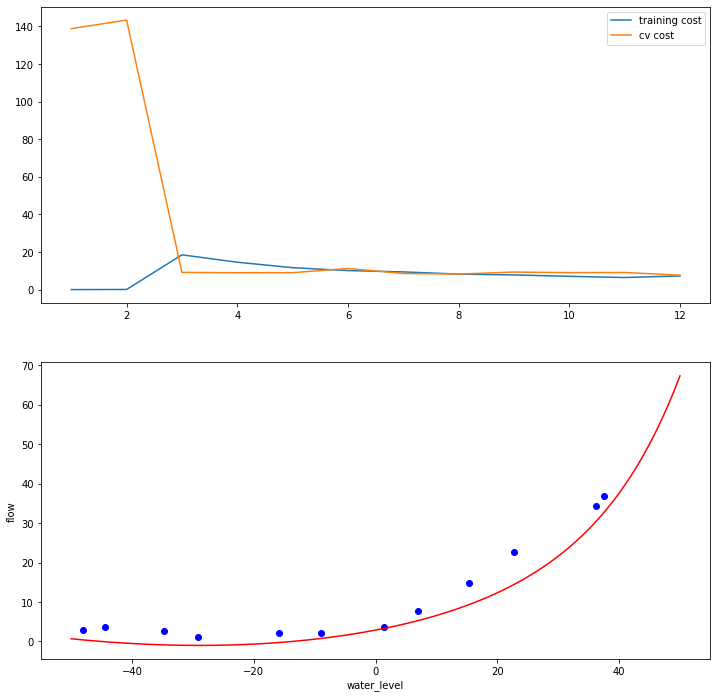

In [26]:
#调整正则化系数λ
plot_learning_curve(X_poly, X, y, Xval_poly, yval, l=1)
plt.show()
#减轻过拟合

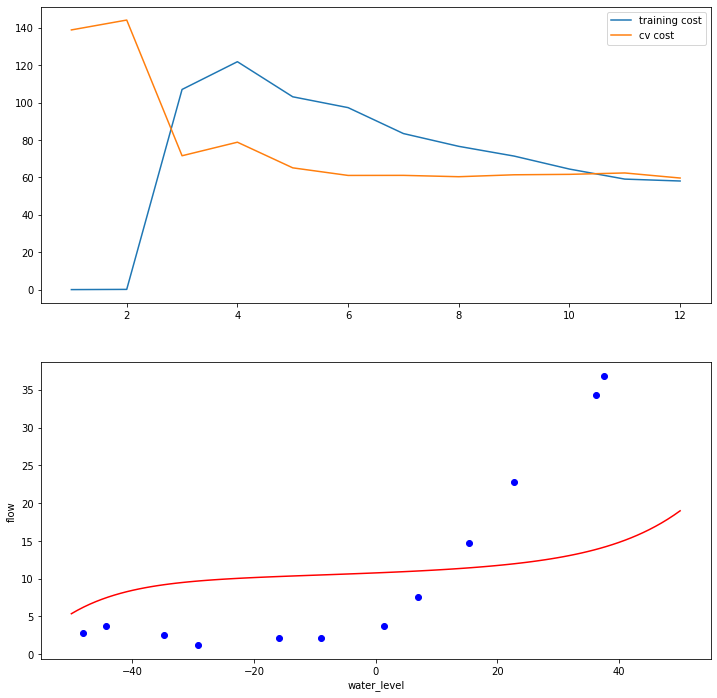

In [27]:
plot_learning_curve(X_poly, X, y, Xval_poly, yval, l=100)
plt.show()
#正则化惩罚太多，变成欠拟合状态

In [28]:
#使用验证集去评价的表现好坏，然后选择表现最好的λ
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []

In [29]:
for l in l_candidate:
    res = linear_regression(X_poly, y, l)
    
    tc = cost(res.x, X_poly, y)
    cv = cost(res.x, Xval_poly, yval)
    
    training_cost.append(tc)
    cv_cost.append(cv)

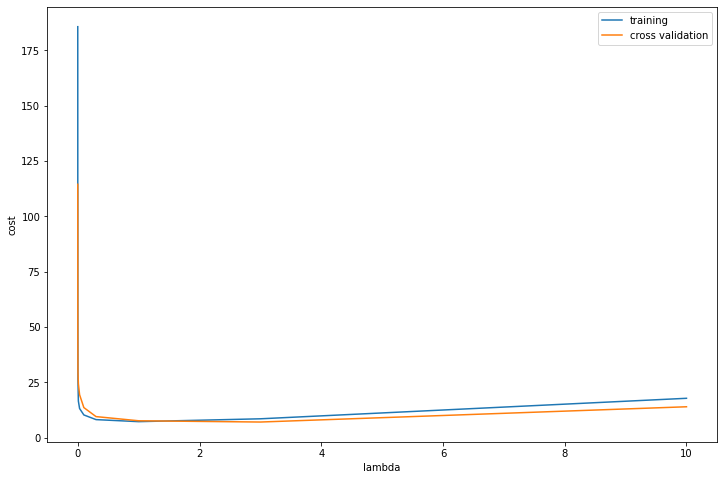

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(l_candidate, training_cost, label='training')
ax.plot(l_candidate, cv_cost, label='cross validation')
plt.legend()

plt.xlabel('lambda')

plt.ylabel('cost')
plt.show()

#对应的λ的值约为1

In [31]:
#计算测试集上的误差，把最终的模型用在一个从来没有在计算中出现过的测试集上，即既没有被用作θ选择，也没有被用作选择λ的数据
for l in l_candidate:
    theta = linear_regression(X_poly, y, l).x
    print('test cost(l={}) = {}'.format(l, cost(theta, Xtest_poly, ytest)))

test cost(l=0) = 116.69690232713525
test cost(l=0.001) = 46.10351993962107
test cost(l=0.003) = 26.29790945333314
test cost(l=0.01) = 20.22676949634041
test cost(l=0.03) = 17.40181639037931
test cost(l=0.1) = 14.255345281059459
test cost(l=0.3) = 11.488568070045726
test cost(l=1) = 10.433102088110367
test cost(l=3) = 13.732759897867563
test cost(l=10) = 28.70250800661905
